In [1]:
#Magic command: the output of plotting commands is displayed inline 
%matplotlib inline 
#Magic command: the definition of the displayed plot is a bit better
%config InlineBackend.figure_format ='retina' 

import numpy as np #math functions as pi,e,random...
import matplotlib.pyplot as plt #default plotting library
import pandas as pd #for printing nice tables (pd.DataFrame)
import seaborn as sbn #extra version of plt
import matplotlib.patches as mpatches #from brokenaxes import brokenaxes
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 #to use Type 42 (a.k.a. TrueType) fonts for PDF files
matplotlib.rcParams['ps.fonttype'] = 42 #to use Type 42 (a.k.a. TrueType) fonts for PostScript files
matplotlib.rcParams.update({'font.size': 7}) #defined font size
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['svg.fonttype'] = 'none' #for neither embedding the font nor rendering the text as path
import matplotlib.ticker as mticker #for configuring tick locating and formatting
from matplotlib.ticker import MultipleLocator, AutoMinorLocator #specific classes to adjust ticks
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, 
                                                  mark_inset) #to create inset in plots
import mpltern #to plot ternary diagrams
from matplotlib.patches import ArrowStyle, FancyArrowPatch #to add arrows
#increases the quality of images
matplotlib.rcParams['figure.dpi']= 200

In [2]:
# Analyses recalculated to Fe3+/Fetot indicated by trial rhyolite‐MELTS (Ghiorso and Sack, 1994; Gualda et al., 2012) calculations at oxygen fugacities corresponding to the NNO buffer
Fe3_Fetot=0.3
#Reading excel file with major and trace elements in bulk rocks
datab = pd.read_excel (r'/Users/alejandrocortes/Documents/EarthSciences/Programming/Python/Lithium/VN_Bulk.xlsx',)
#Creating two arrays with specific data from excel file using the name of the columns/Users/alejandrocortescalderon/Documents/EarthSciences
dfbm = pd.DataFrame(datab, columns= ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'TOTAL'])
dfbt = pd.DataFrame(datab, columns= ['Li7','Be9','Na23','Mg25','Al27','Si29','P31','K39','Ca42','Sc45','Ti49','V51','Cr53','Mn55','Fe57','Co59','Ni62','Cu65','Zn66','Ga71','Ge72','Se77','Rb85','Sr88','Y89','Zr90','Nb93','Mo95','Sn118','Cs133','Ba137','La139','Ce140','Pr141','Nd146','Sm147','Eu151','Gd157','Tb159','Dy163','Ho165','Er167','Tm169','Yb173','Lu175','Hf178','Ta181','W182','Tl205','Pb208','Th232','U238','color','ty'])
df_REEb = pd.DataFrame(datab, columns= ['La139','Ce140','Pr141','Nd146','Sm147','Eu151','Gd157','Tb159','Dy163','Ho165','Er167','Tm169','Yb173','Lu175','ID'])
df_spiderb = pd.DataFrame(datab, columns= ['Cs133','Rb85','Ba137','Th232','U238','K39','Nb93','Ta181','La139','Ce140','Pb208','Sr88','Nd146','P31','Sm147','Zr90','Hf178','Ti49','Tb159','Y89','Yb173','Lu175','color','ty'])
#transform the arrays to new ones which can bed use to perform calculations
databm = dfbm.to_numpy()
databt = dfbt.to_numpy()
data_spiderb = df_spiderb.to_numpy()
data_REEb = df_REEb.to_numpy()
if len(databm[0,:])==11:
    #calculate FeO from Fe2O3tot and Fe3+/Fe2O3tot ratio
    FeO = databm[:,3]*(1-Fe3_Fetot)/1.11134
    #add the calculated FeO data to the array
    databm = np.append(databm,np.reshape(FeO,(len(FeO),1)),axis=1)
    #Substracts FeOtot from the total and adds the FeO
    databm[:,10] = databm[:,10]-databm[:,3]+databm[:,11]
    #calculate Fe2O3 from Fe2O3tot and Fe3+/Fetot ratio, also calculate new total
    databm[:,3] = databm[:,3]*Fe3_Fetot
    databm[:,10] = databm[:,10]+databm[:,3]
#num of analyses
a = len(databm[:,0])
#dummy array
b=np.zeros(a)
#loop to find totals lower than 95wt%
for i in range (a):
    if databm[i,10]<95:
        #storing the index of analyses lower than 95wt%
        b[i]=i
#deleting dummy indexes
b=b[b != 0]
#removing analyses with totals less than 95wt%
databm = np.delete(databm,b.astype(int),0)
databt = np.delete(databt,b.astype(int),0)
data_spiderb = np.delete(data_spiderb,b.astype(int),0)
data_REEb = np.delete(data_REEb,b.astype(int),0)
#duplicates the data array
databm_anh = np.copy(databm)
#indexes a - num of analyses and b - num of oxides + total
a = len(databm_anh[:,0])
b = len(databm_anh[0,:])
#To avoid that Fe2O3 gets altered by the update of Tot in loop
d= np.copy(databm_anh[:,10])
#double loop to normalise anhydrous
for i in range (a):
    for j in range (b):
        databm_anh[i,j]= databm_anh[i,j]*100/d[i]

In [3]:
#duplicates the data array
databm_mol = np.copy(databm_anh)
#indexes a - num of analyses and b - num of oxides + total
a = len(databm_mol[:,0])
b = len(databm_mol[0,:])
#molecular weights
mw = [60.08, 79.87, 101.96, 159.7, 70.94, 40.3, 56.08, 61.98, 94.2, 141.94, 100, 71.85]
#double loop to convert to molar
for i in range (a):
    for j in range (b):
        databm_mol[i,j]= databm_mol[i,j]/mw[j]
#OXIDES OTHER THAN SILICA
#creates empty array
oots=np.zeros((a,23))
#loop calculation
for i in range (a):
    oots[i,0]=databm_mol[i,9]*10/3 #ap Ca
    oots[i,1]=databm_mol[i,9] #ap P
    oots[i,2]=databm_mol[i,1] #ilm Fe II
    oots[i,3]=databm_mol[i,1] #ilm Ti
    oots[i,4]=databm_mol[i,8] #or/lc AL
    oots[i,5]=databm_mol[i,8] #or/lc K
    #ab/ne Al
    if databm_mol[i,7]>(databm_mol[i,2]-oots[i,4]):
        oots[i,6]=databm_mol[i,2]-oots[i,4]
    else:
        oots[i,6]=databm_mol[i,7]
    oots[i,7]=oots[i,6] #ab/ne Na
    #ac Fe III
    if (databm_mol[i,7]-oots[i,7])<databm_mol[i,3]:
        oots[i,9]=databm_mol[i,7]-oots[i,7]
    else:
        oots[i,9]=databm_mol[i,3]
    oots[i,8]=oots[i,9] #ac Na
    oots[i,10]=databm_mol[i,7]-oots[i,7]-oots[i,8] #ns Na
    oots[i,12]=databm_mol[i,3]-oots[i,9] #mt Fe III
    oots[i,11]=oots[i,12] #mt Fe II
    #an Al prelim
    if oots[i,8]>0.000001: 
        oots[i,13]=0
    else:
        oots[i,13]=databm_mol[i,2]-oots[i,4]-oots[i,6]
    #an Al final
    if oots[i,13]>(databm_mol[i,6]-oots[i,0]):
        oots[i,14]=databm_mol[i,6]-oots[i,0]
    else:
        oots[i,14]=oots[i,13]
    #C Al
    if oots[i,13]==oots[i,14]:
        oots[i,15]=0
    else:
        oots[i,15]=oots[i,13]-oots[i,14]
    oots[i,16]=oots[i,14] #an Ca
    oots[i,17]=databm_mol[i,6]-oots[i,0]-oots[i,16] #di Ca
    # Mg number for px
    oots[i,22]=databm_mol[i,5]/(databm_mol[i,5]+ databm_mol[i,11]+ databm_mol[i,4]- oots[i,2]- oots[i,11])
    oots[i,18]=oots[i,17]*oots[i,22] #di Mg
    oots[i,19]=oots[i,17]*(1-oots[i,22]) #di Fe II
    #ol/hy Fe II
    oots[i,20]=databm_mol[i,11]+ databm_mol[i,4]- oots[i,2]- oots[i,11]- oots[i,19]
    oots[i,21]=databm_mol[i,5]-oots[i,18] #ol/hy Mg
    
#FIRST PASS SILICA
#creates empty array
fps=np.zeros((a,8))
#loop calculation
for i in range (a):
    fps[i,0]=4*oots[i,5] #lc
    fps[i,1]=2*oots[i,7] #ne
    fps[i,2]=4*oots[i,8] #ac
    fps[i,3]=oots[i,10] #ns
    fps[i,4]=2*oots[i,16] #an
    fps[i,5]=2*oots[i,17] #di
    fps[i,6]=(oots[i,20]+oots[i,21])/2 #ol
    #residual Si
    fps[i,7]=databm_mol[i,0]- (fps[i,0]+ fps[i,1]+ fps[i,2]+ fps[i,3]+ fps[i,4]+ fps[i,5]+ fps[i,6])
    
#SECOND PASS SILICA
#creates empty array
sps=np.zeros((a,11))
#loop calculation
for i in range (a):
    #or K
    if (oots[i,5]*2)>fps[i,7]:
        sps[i,0]=(fps[i,0]+(fps[i,7]-(oots[i,5]*2)))/2
    else:
        sps[i,0]=oots[i,5]
    #lc K
    sps[i,1]=oots[i,5]-sps[i,0]
    #residual Si
    sps[i,2]=fps[i,7]-(2*sps[i,0])
    #ab Na
    if (oots[i,7]*4)>sps[i,2]:
        sps[i,3]=(sps[i,2]+fps[i,1]-(2*oots[i,7]))/4
    else:
        sps[i,3]=oots[i,7]
    #ne Na
    sps[i,4]=oots[i,7]-sps[i,3]
    #residual Si
    sps[i,5]=sps[i,2]-(4*sps[i,3])
    #prelim ol Mg
    if sps[i,4]>0.0000001:
        sps[i,6]=oots[i,20]+oots[i,21]
    else:
        sps[i,6]=oots[i,20]+oots[i,21]-(2*sps[i,5])
    #prelim hy Mg
    sps[i,7]=oots[i,20]+oots[i,21]-sps[i,6]
    #actual ol and hy mg and residual silica
    if sps[i,6]<0:
        sps[i,8]=0
        sps[i,9]=oots[i,20]+oots[i,21]
        sps[i,10]=sps[i,5]-((oots[i,20]+oots[i,21])/2)
    else:
        sps[i,8]=sps[i,6]
        sps[i,9]=sps[i,7]
        sps[i,10]=0
#FINAL SILICA
#creates empty array
fs=np.zeros((a,7))
#loop for calculation
for i in range (a):
    fs[i,0]=6*sps[i,0] #or
    fs[i,1]=4*sps[i,1] #lc
    fs[i,2]=6*sps[i,3] #ab
    fs[i,3]=2*sps[i,4] #ne
    fs[i,4]=0.5*sps[i,8] #ol
    fs[i,5]=sps[i,9] #hy
    fs[i,6]=sps[i,10] #Q
#NORM WT%
nbm_wt=np.zeros((a,16))
for i in range(a):
    nbm_wt[i,0]=fs[i,6]*60.08 #Q
    nbm_wt[i,1]=sps[i,0]*556.64 #or
    nbm_wt[i,2]=sps[i,1]*436.48 #lc
    nbm_wt[i,3]=sps[i,3]*524.42 #ab
    nbm_wt[i,4]=sps[i,4]*284.1 #ne
    nbm_wt[i,5]=oots[i,16]*278.2 #an
    nbm_wt[i,6]=oots[i,15]*101.96 #C
    nbm_wt[i,7]=oots[i,8]*462 #ac
    nbm_wt[i,8]=oots[i,10]*122.06 #ns
    #di
    nbm_wt[i,9]=(oots[i,17]* 116.16)+ (oots[i,18]* 100.38)+ (oots[i,19]* 131.39)
    #ol
    nbm_wt[i,10]=(sps[i,8]* 70.34* oots[i,22])+ (sps[i,8]* (1-oots[i,22])* 101.89)
    #hy
    nbm_wt[i,11]=(sps[i,9]* 100.38* oots[i,22])+ (sps[i,9]* (1-oots[i,22])* 131.93)
    nbm_wt[i,12]=oots[i,12]*231.55 #mt
    nbm_wt[i,13]=oots[i,3]*151.72 #ilm
    nbm_wt[i,14]=oots[i,1]*328.87 #ap
    nbm_wt[i,15]=np.sum(nbm_wt[i,:-1]) #total
#DIFFERENTIATION INDEX (q+ab+or+lc+ne+ac+ns)
#creates empty array
DIbm=np.zeros(a)
for i in range (a):
    DIbm[i]=np.sum(nbm_wt[i,:5])+nbm_wt[i,8]
#Normcoordinates
norm_molp=np.zeros((a,5))
QneKs_wt=np.zeros((a,3))
QneKs_coord=np.zeros((a,3))
for i in range (a):
    norm_molp[i,0]=nbm_wt[i,0]/60.09
    norm_molp[i,1]=nbm_wt[i,1]/(39.1+26.98+28.09*3+16*8)
    norm_molp[i,2]=nbm_wt[i,2]/(39.1+26.98+28.09*2+16*6)
    norm_molp[i,3]=nbm_wt[i,3]/(22.99+26.98+28.09*3+16*8)
    norm_molp[i,4]=nbm_wt[i,4]/(22.99+26.98+28.09+16*4)
for i in range (a):
    QneKs_wt[i,0]=(norm_molp[i,0]+2*norm_molp[i,1]+norm_molp[i,2]+2*norm_molp[i,3])*60.09
    QneKs_wt[i,1]=(norm_molp[i,4]+norm_molp[i,3])*(22.99+26.98+28.09+16*4)
    QneKs_wt[i,2]=(norm_molp[i,1]+norm_molp[i,2])*(39.1+26.98+28.09+16*4)
for i in range (a):
    QneKs_coord[i,0]=QneKs_wt[i,0]/np.sum(QneKs_wt[i,:])*100
    QneKs_coord[i,1]=QneKs_wt[i,1]/np.sum(QneKs_wt[i,:])*100
    QneKs_coord[i,2]=QneKs_wt[i,2]/np.sum(QneKs_wt[i,:])*100

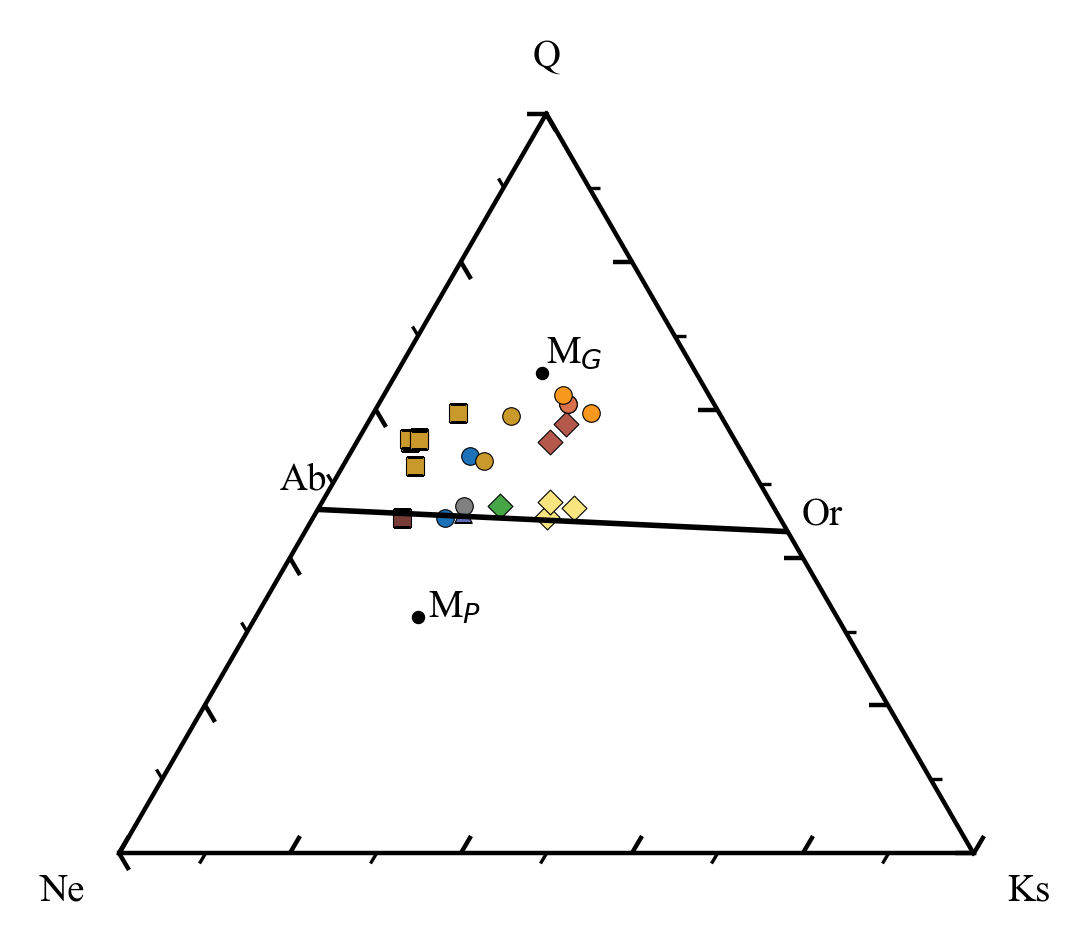

In [6]:
cm = 1/2.54
colors = ['#46A647', '#F9E57F', '#F9E57F', '#B3584B', '#F9E57F', '#B3584B', '#783C37', '#CA992C', '#CA992C', '#CA992C', '#CA992C', '#CA992C', '#CA992C', '#5E6DB3', '#D8724D', '#F8991D', '#D8724D', '#1C71B9', '#CA992C', '#808080', '#F8991D', '#1C71B9', '#CA992C']
shape = ['D','s','^','o']  
fig = plt.figure(figsize=(7*cm,7*cm))
ax2 = fig.add_subplot(111,projection='ternary')
for i in range (a):
    ax2.scatter(QneKs_coord[i,0],QneKs_coord[i,1],QneKs_coord[i,2],facecolors=colors[int(data_spiderb[i,-2])],marker=shape[int(data_spiderb[i,-1])],linewidth=0.2,edgecolors='k',s=10)
           
x5=[46.5,43.5]
y5=[53.5,0]
z5=[0,56.5]
ax2.plot(x5,y5,z5,c='k',linewidth=1)
ax2.tick_params(direction='in')
ax2.set_tlabel('Q',fontsize=7)
ax2.set_llabel('Ne',fontsize=7)
ax2.set_rlabel('Ks',fontsize=7)
ax2.laxis.set_label_rotation_mode('horizontal')
ax2.raxis.set_label_rotation_mode('horizontal')
ax2.taxis.set_ticklabels([])
ax2.laxis.set_ticklabels([])
ax2.raxis.set_ticklabels([])
ax2.raxis.set_minor_locator(AutoMinorLocator(2))
ax2.laxis.set_minor_locator(AutoMinorLocator(2))
ax2.taxis.set_minor_locator(AutoMinorLocator(2))
ax2.text(46.5,53.5,-5.5, 'Ab'  , color='k', rotation=-0,fontsize=7)
ax2.text(43.5,-2,56.5, 'Or'  , color='k', rotation=-0,fontsize=7)
ax2.scatter(65,18,17, c='k',s=2)
ax2.scatter(32,49,19, c='k',s=2)
ax2.text(67,17,17, 'M${_{G}}$'  , color='k', rotation=-0,fontsize=7)
ax2.text(30,45,19, 'M${_{P}}$'  , color='k', rotation=-0,fontsize=7)

fig.savefig('FigClarita.pdf',dpi=600, transparent=True, bbox_inches='tight')